<a href="https://colab.research.google.com/github/himanshushreesari/DS_mini_project_himanshu/blob/main/LabPractical/DS_Pract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Salary_Data[1].csv')

# Display the first 5 rows of the DataFrame
display(df.head())

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [11]:
print(f"DataFrame shape: {df.shape}")

df.info()

print("\nMissing values per column:")
print(df.isnull().sum())

DataFrame shape: (6704, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB

Missing values per column:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [12]:
print("Descriptive statistics for numerical columns:")
print(df.describe())

Descriptive statistics for numerical columns:
               Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000


In [13]:
categorical_cols = ['Gender', 'Education Level', 'Job Title']

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("Value counts:")
    print(df[col].value_counts())


Column: Gender
Number of unique values: 3
Value counts:
Gender
Male      3674
Female    3014
Other       14
Name: count, dtype: int64

Column: Education Level
Number of unique values: 7
Value counts:
Education Level
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

Column: Job Title
Number of unique values: 193
Value counts:
Job Title
Software Engineer                 518
Data Scientist                    453
Software Engineer Manager         376
Data Analyst                      363
Senior Project Engineer           318
                                 ... 
Junior Social Media Specialist      1
Senior Software Architect           1
Developer                           1
Social M                            1
Social Media Man                    1
Name: count, Length: 193, dtype: int64


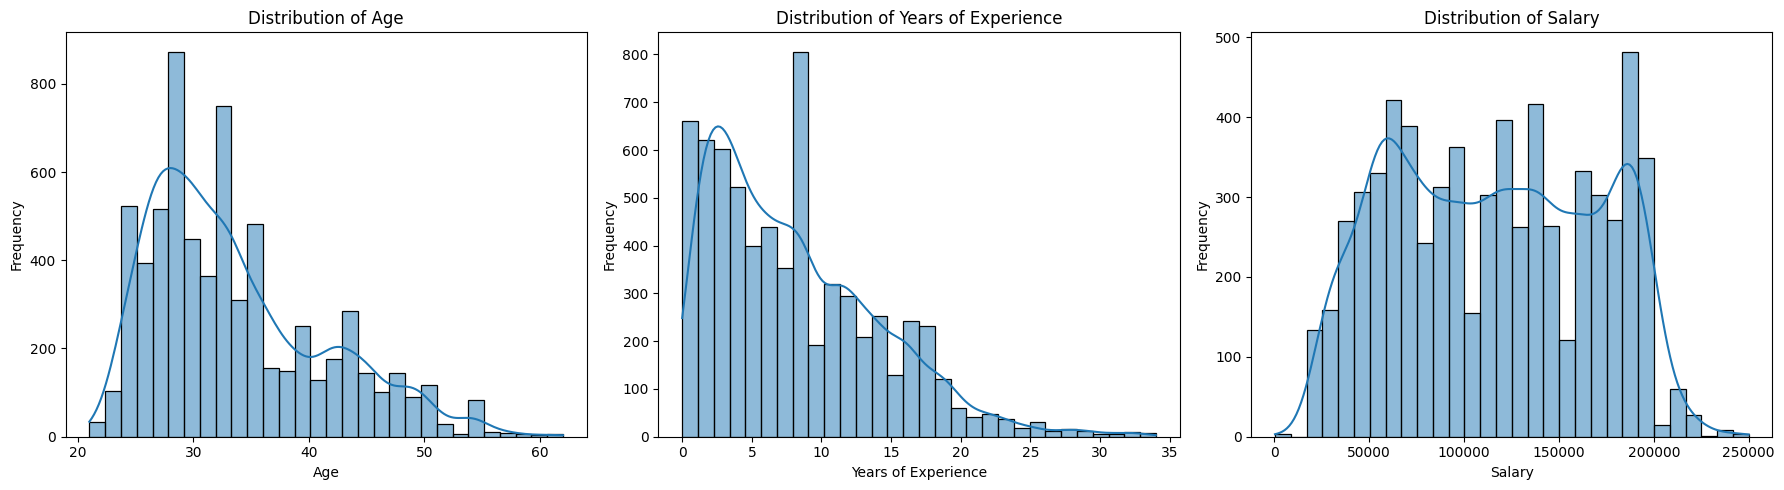

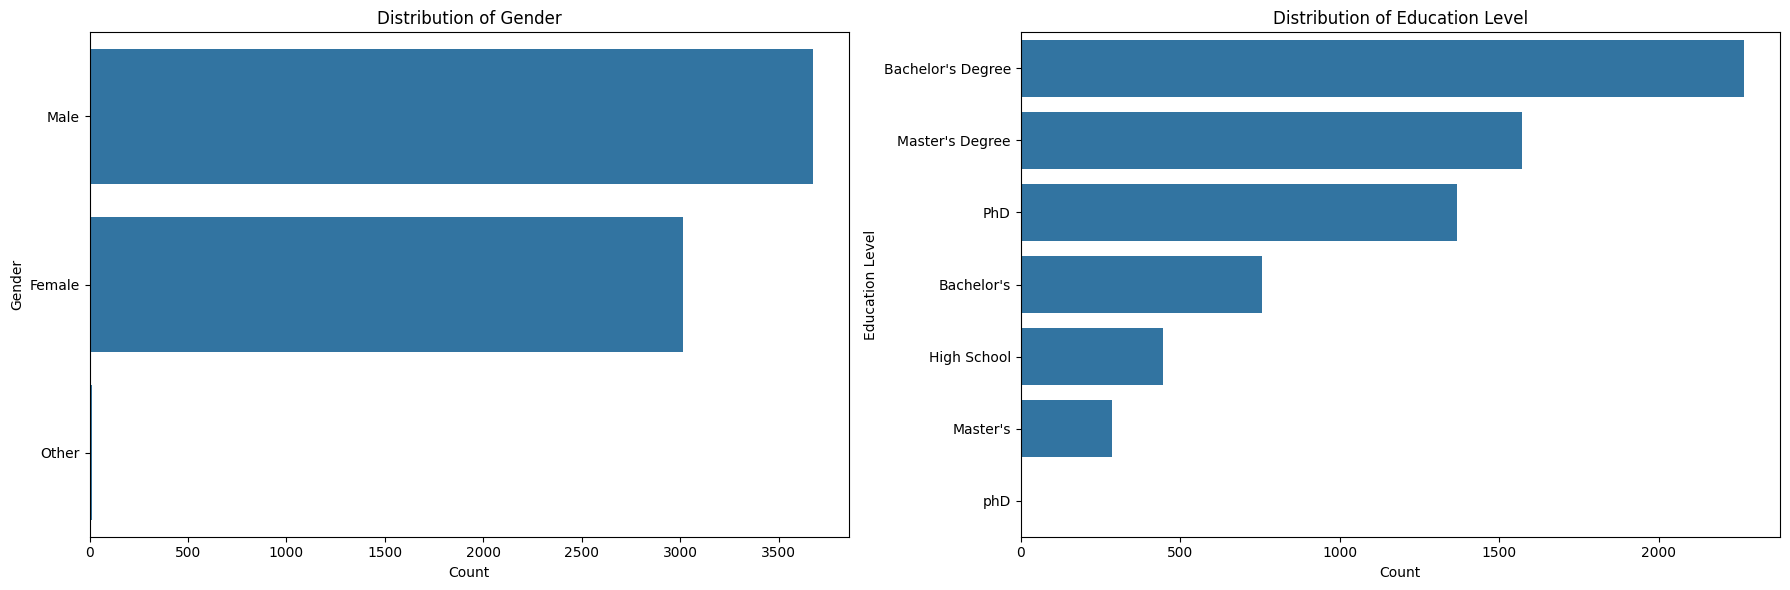

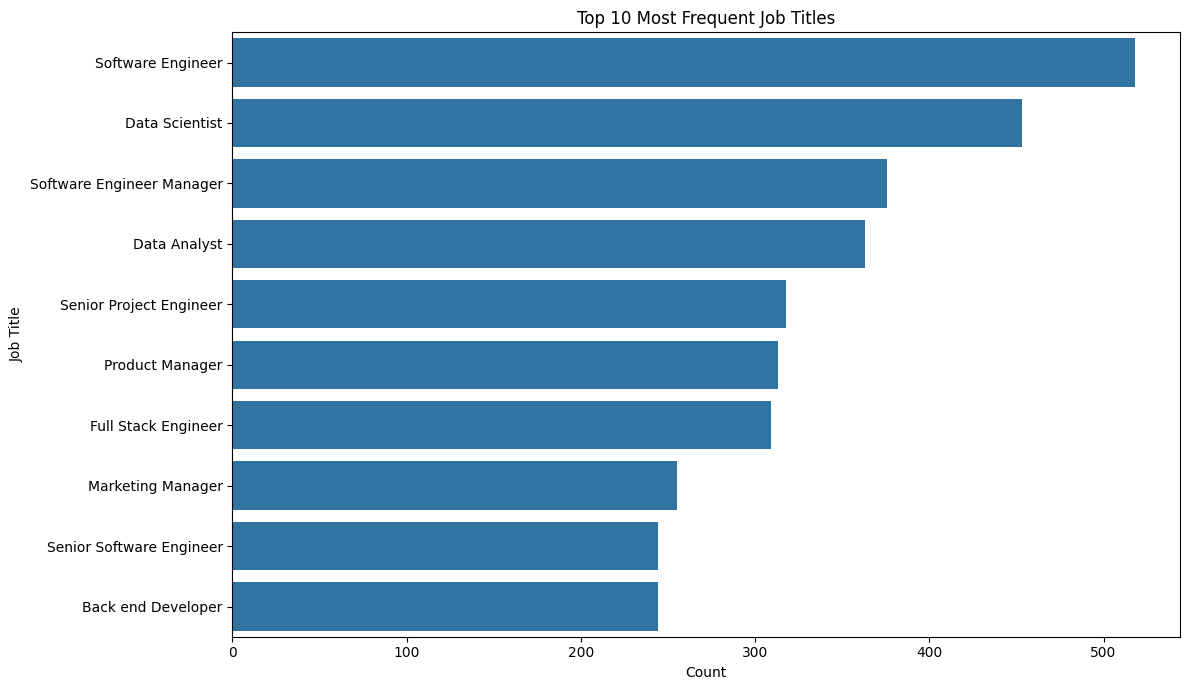

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Histograms for numerical features
numerical_cols = ['Age', 'Years of Experience', 'Salary']

plt.figure(figsize=(18, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 3. Bar plots for low-cardinality categorical features
low_cardinality_categorical_cols = ['Gender', 'Education Level']

plt.figure(figsize=(18, 6))
for i, col in enumerate(low_cardinality_categorical_cols):
    plt.subplot(1, 2, i + 1)
    sns.countplot(y=df[col].dropna(), order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# 4. Bar plot for top 10 'Job Title' (high cardinality)
plt.figure(figsize=(12, 7))
top_10_job_titles = df['Job Title'].value_counts().nlargest(10).index
sns.countplot(y=df['Job Title'], order=top_10_job_titles)
plt.title('Top 10 Most Frequent Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

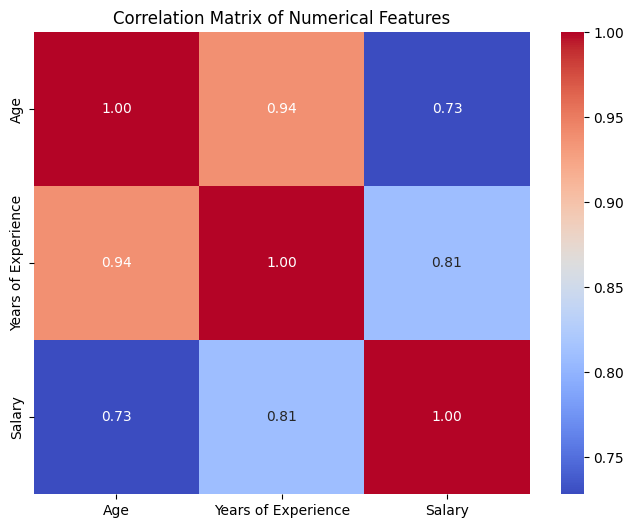

In [15]:
numerical_cols = ['Age', 'Years of Experience', 'Salary']

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [16]:
print("Before imputation:")
print(df.isnull().sum())

# Impute numerical columns with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Years of Experience'].fillna(df['Years of Experience'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)

# Impute categorical columns with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Education Level'].fillna(df['Education Level'].mode()[0], inplace=True)
df['Job Title'].fillna(df['Job Title'].mode()[0], inplace=True)

print("\nAfter imputation:")
print(df.isnull().sum())

Before imputation:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

After imputation:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


/tmp/ipython-input-1168345444.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-1168345444.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [17]:
print("Before imputation:")
print(df.isnull().sum())

# Impute numerical columns with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Years of Experience'] = df['Years of Experience'].fillna(df['Years of Experience'].mean())
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

# Impute categorical columns with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Education Level'] = df['Education Level'].fillna(df['Education Level'].mode()[0])
df['Job Title'] = df['Job Title'].fillna(df['Job Title'].mode()[0])

print("\nAfter imputation:")
print(df.isnull().sum())

Before imputation:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

After imputation:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [18]:
print("Before standardization:")
print(df['Education Level'].value_counts())

# Standardize 'Education Level' column
df['Education Level'] = df['Education Level'].replace("Bachelor's", "Bachelor's Degree")
df['Education Level'] = df['Education Level'].replace("Master's", "Master's Degree")
df['Education Level'] = df['Education Level'].replace("phD", "PhD")

print("\nAfter standardization:")
print(df['Education Level'].value_counts())

Before standardization:
Education Level
Bachelor's Degree    2270
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

After standardization:
Education Level
Bachelor's Degree    3026
Master's Degree      1861
PhD                  1369
High School           448
Name: count, dtype: int64


In [19]:
categorical_cols = ['Gender', 'Education Level', 'Job Title']

# Apply one-hot encoding with drop_first=True
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the updated DataFrame
print("DataFrame after one-hot encoding:")
display(df_encoded.head())

DataFrame after one-hot encoding:


,Age,Years of Experience,Salary,Gender_Male,Gender_Other,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Job Title_Accountant,Job Title_Administrative Assistant,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,5.0,90000.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,28.0,3.0,65000.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45.0,15.0,150000.0,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36.0,7.0,60000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52.0,20.0,200000.0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5363, 199)
Shape of X_test: (1341, 199)
Shape of y_train: (5363,)
Shape of y_test: (1341,)


Simple Linear Regression Metrics:
R-squared: 0.6529
Mean Absolute Error (MAE): 24424.62
Mean Squared Error (MSE): 927079077.87


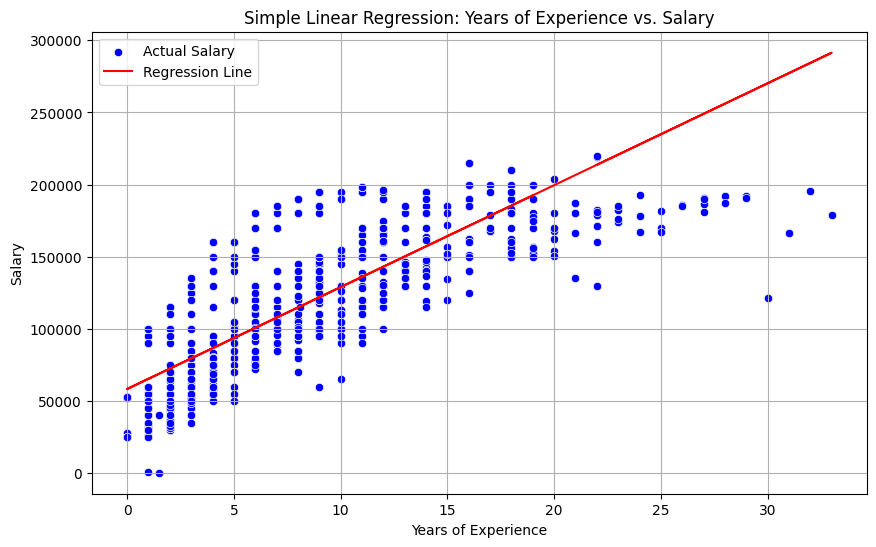

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Create X_simple and X_test_simple
X_simple = X_train[['Years of Experience']]
X_test_simple = X_test[['Years of Experience']]

# 4. Initialize a LinearRegression model
simple_linear_model = LinearRegression()

# 5. Train the model
simple_linear_model.fit(X_simple, y_train)

# 6. Make predictions on X_test_simple
y_pred_simple = simple_linear_model.predict(X_test_simple)

# 7. Calculate and print evaluation metrics
mae_simple = mean_absolute_error(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print(f"Simple Linear Regression Metrics:")
print(f"R-squared: {r2_simple:.4f}")
print(f"Mean Absolute Error (MAE): {mae_simple:.2f}")
print(f"Mean Squared Error (MSE): {mse_simple:.2f}")

# 8 & 9. Create scatter plot and overlay regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_simple['Years of Experience'], y=y_test, color='blue', label='Actual Salary')
plt.plot(X_test_simple['Years of Experience'], y_pred_simple, color='red', label='Regression Line')

# 10. Add labels and title
plt.title('Simple Linear Regression: Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize a LinearRegression model
multiple_linear_model = LinearRegression()

# Train the model
multiple_linear_model.fit(X_train, y_train)

# Make predictions on X_test
y_pred_multiple = multiple_linear_model.predict(X_test)

# Calculate and print evaluation metrics
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print(f"Multiple Linear Regression Metrics:")
print(f"R-squared: {r2_multiple:.4f}")
print(f"Mean Absolute Error (MAE): {mae_multiple:.2f}")
print(f"Mean Squared Error (MSE): {mse_multiple:.2f}")

Multiple Linear Regression Metrics:
R-squared: 0.8362
Mean Absolute Error (MAE): 15172.61
Mean Squared Error (MSE): 437501114.21


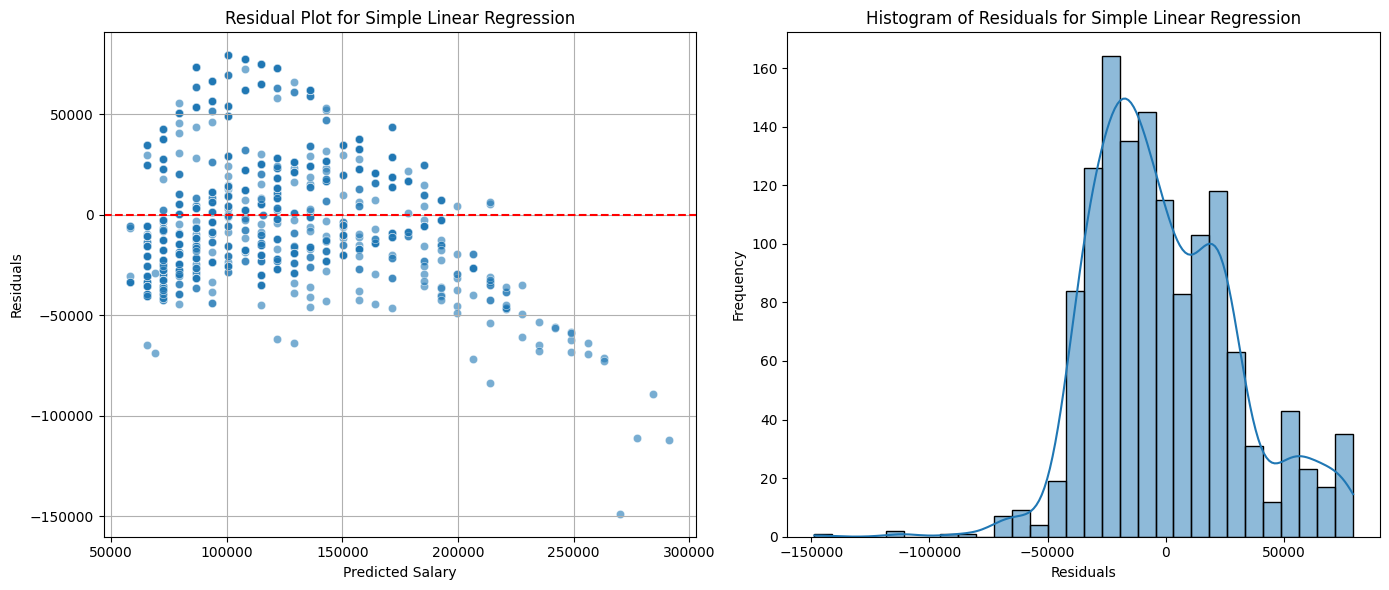

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate residuals for the simple linear regression model
residuals_simple = y_test - y_pred_simple

# 2. Create a figure with two subplots
plt.figure(figsize=(14, 6))

# 3. Residual Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_simple, y=residuals_simple, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Simple Linear Regression')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.grid(True)

# 4. Histogram of Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals_simple, kde=True, bins=30)
plt.title('Histogram of Residuals for Simple Linear Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# 5. Ensure a tight layout and display plots
plt.tight_layout()
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

# Define the independent variable (X_simple_reg)
X_simple_reg = df_encoded[['Years of Experience']]

# Define the dependent variable (y_simple_reg)
y_simple_reg = df_encoded['Salary']

# Split the data into training and testing sets (80% training, 20% testing)
X_train_simple_reg, X_test_simple_reg, y_train_simple_reg, y_test_simple_reg = train_test_split(
    X_simple_reg, y_simple_reg, test_size=0.2, random_state=42
)

print("Shape of X_train_simple_reg:", X_train_simple_reg.shape)
print("Shape of X_test_simple_reg:", X_test_simple_reg.shape)
print("Shape of y_train_simple_reg:", y_train_simple_reg.shape)
print("Shape of y_test_simple_reg:", y_test_simple_reg.shape)

Shape of X_train_simple_reg: (5363, 1)
Shape of X_test_simple_reg: (1341, 1)
Shape of y_train_simple_reg: (5363,)
Shape of y_test_simple_reg: (1341,)


Simple Linear Regression Metrics (New Data Split):
R-squared: 0.6529
Mean Absolute Error (MAE): 24424.62
Mean Squared Error (MSE): 927079077.87


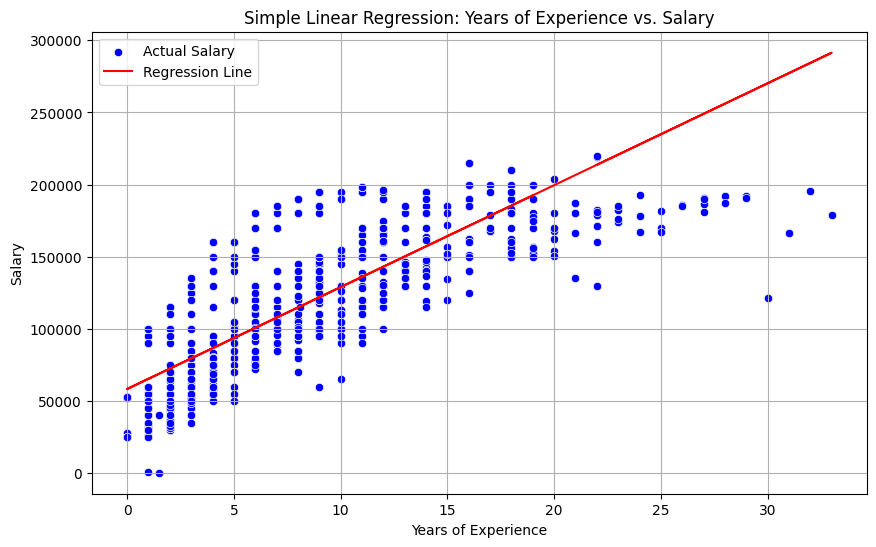

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a LinearRegression model
simple_linear_model_new = LinearRegression()

# Train the model
simple_linear_model_new.fit(X_train_simple_reg, y_train_simple_reg)

# Make predictions on X_test_simple_reg
y_pred_simple_reg = simple_linear_model_new.predict(X_test_simple_reg)

# Calculate and print evaluation metrics
mae_simple_new = mean_absolute_error(y_test_simple_reg, y_pred_simple_reg)
mse_simple_new = mean_squared_error(y_test_simple_reg, y_pred_simple_reg)
r2_simple_new = r2_score(y_test_simple_reg, y_pred_simple_reg)

print(f"Simple Linear Regression Metrics (New Data Split):")
print(f"R-squared: {r2_simple_new:.4f}")
print(f"Mean Absolute Error (MAE): {mae_simple_new:.2f}")
print(f"Mean Squared Error (MSE): {mse_simple_new:.2f}")

# Create scatter plot and overlay regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_simple_reg['Years of Experience'], y=y_test_simple_reg, color='blue', label='Actual Salary')
plt.plot(X_test_simple_reg['Years of Experience'], y_pred_simple_reg, color='red', label='Regression Line')

# Add labels and title
plt.title('Simple Linear Regression: Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

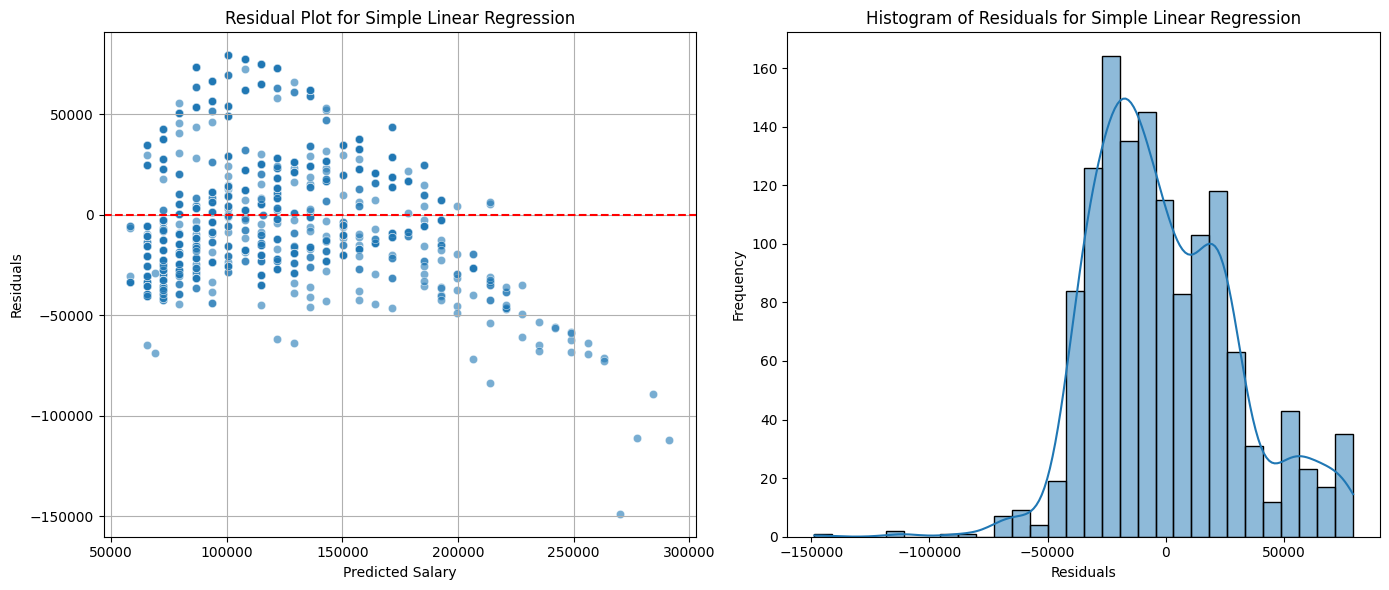

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate residuals for the simple linear regression model
residuals_simple_new = y_test_simple_reg - y_pred_simple_reg

# 2. Create a figure with two subplots
plt.figure(figsize=(14, 6))

# 3. Residual Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_simple_reg, y=residuals_simple_new, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Simple Linear Regression')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.grid(True)

# 4. Histogram of Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals_simple_new, kde=True, bins=30)
plt.title('Histogram of Residuals for Simple Linear Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# 5. Ensure a tight layout and display plots
plt.tight_layout()
plt.show()